<h1> Draft report of 215 <h1>

<h2> Integrating a known function <h2>

In [1]:
from pylab import *
from matplotlib import *
import matplotlib.pyplot as pyplot
import numpy as np
from scipy.integrate import odeint

<p> By putting the following code, the differential equation ... is defined and specified: <p>

In [2]:
#Step 1
def deriv1(v,t):
    return 1.0+2.0*np.sin(3.0*t)

By putting the following code, this differential equation is numerically solved by the function odeint.

In [3]:
#Step 2
init = -1.0;
step = 0.1;
tout = arange(0,10,step)
vout = odeint(deriv1,init,tout)


Then, the numerical output is compared with the analytical solution of this differential equation, which is supposed to be overlapping perfectly. The plot has sucessfully shows that the numerical solution overlaps with the analytical solution well, which fits with what I have expected.

Text(0, 0.5, 'v')

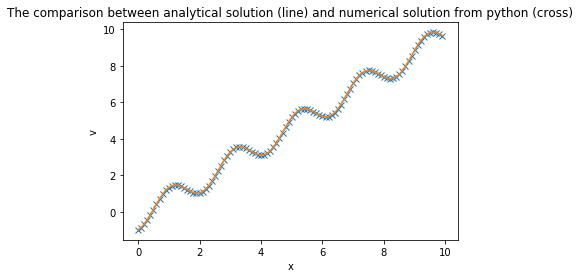

In [4]:
#Step 3
vanalyt = tout - (1.0+2.0*cos(3.0*tout))/3.0;
plot(tout,vout,'x',tout,vanalyt)
pyplot.title('The comparison between analytical solution (line) and numerical solution from python (cross)')
pyplot.xlabel('x')
pyplot.ylabel('v')

Text(0, 0.5, 'v')

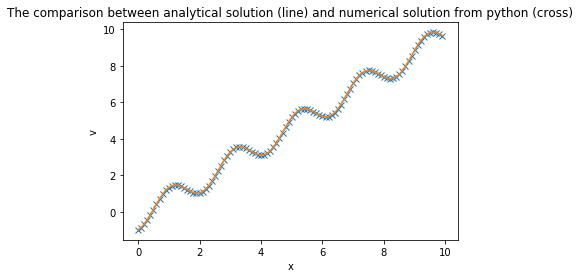

In [5]:
#First section allin
#Step 1
def deriv1(v,t):
    return 1.0+2.0*np.sin(3.0*t)
#Step 2
init = -1.0;
step = 0.1;
tout = arange(0,10,step)
vout = odeint(deriv1,init,tout)
#Step 3
vanalyt = tout - (1.0+2.0*cos(3.0*tout))/3.0;
plot(tout,vout,'x',tout,vanalyt)
pyplot.title('The comparison between analytical solution (line) and numerical solution from python (cross)')
pyplot.xlabel('x')
pyplot.ylabel('v')

<h2> A scalar first-order differential equation <h2>

The following code defines a slightly different differential equation from the first example. In this case, a feedback from the output of the integration is introduced to the differential equation.

In [6]:
#Step 4
def deriv2(v,t):
    return -v + 1.0+2.0*np.sin(3.0*t)

Then, similar to step 3, the numerical output is compared with the analytical solution of this differential equation, which is supposed to be overlapping perfectly. The plot has sucessfully shows that the numerical solution overlaps with the analytical solution well, which fits with what I have expected.

Text(0, 0.5, 'v')

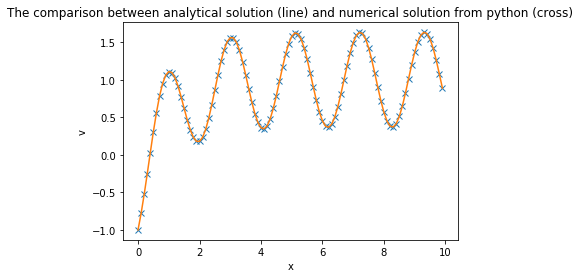

In [7]:
#Step 5
init = -1.0;
step = 0.1;
tout = arange(0,10,step)
vout = odeint(deriv2,init,tout)
vanalyt = (5 + sin(3*tout) - 3 * cos(3*tout) - 7 * exp(-1 * tout))/5;

plot(tout,vout,'x')
plot(tout,vanalyt)
pyplot.title('The comparison between analytical solution (line) and numerical solution from python (cross)')
pyplot.xlabel('x')
pyplot.ylabel('v')

Text(0, 0.5, 'v')

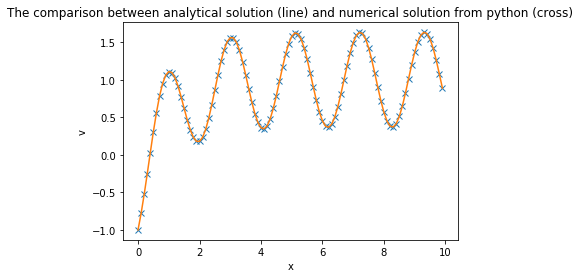

In [8]:
#ALL IN
#Step 4
def deriv2(v,t):
    return -v + 1.0+2.0*np.sin(3.0*t)
#Step 5
init = -1.0;
step = 0.1;
tout = arange(0,10,0.1)
tout2 = arange(0,10,step)
vout = odeint(deriv2,init,tout)
vanalyt = (5 + sin(3*tout2) - 3 * cos(3*tout2) - 7 * exp(-1 * tout2))/5;

plot(tout,vout,'x')
plot(tout2,vanalyt)
pyplot.title('The comparison between analytical solution (line) and numerical solution from python (cross)')
pyplot.xlabel('x')
pyplot.ylabel('v')

<h2> Damped ODE <h2>

The following code puts the higher order differential equations into a system of equations, which corresponds to an array of equations in PYTHON.

In [9]:
#Step 6
def shm(x,t,B,C):
    return np.array([-B*x[0]-C*x[1], x[0]])

Then, the following code solves the ODE by using odeint, note that the args entries puts the value of B and C,and two intial conditions are applied to the function.

In [10]:
#Step 7
tout=arange(0,2,0.02)
xout = odeint(shm,[0,10],tout,args=(0,4.0*pi**2)); #Arg put the input for B and C, initial condition is defined at 0, 10 for x[0], x[1]

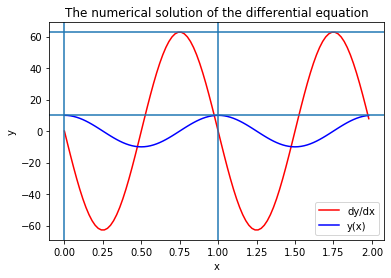

In [11]:
#Step 8
fig, ax = pyplot.subplots()
ax.plot(tout,xout[:,0], 'r', label='dy/dx')
ax.plot(tout,xout[:,1], 'b', label='y(x)')
pyplot.title('The numerical solution of the differential equation')
leg = ax.legend();
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.axvline(x=0)
pyplot.axvline(x=1)
pyplot.axhline(y=10)
pyplot.axhline(y=20*pi)

The relative phase between velocity and displacement is supposed to be completely out of phase, since a zero of velocity means a peak in displacement, which the plot shows what we have expected.
The analytical solution for this differential equation is: y' = 20*pi*sin(2*pi*t) and y = 10*cos(2*pi*t). which implies that amplitude for dy/dx is 20, and 10/pi for y, which both of the plot has shown.
The analytical solution implies that both plot has frequency of 1Hz, which is shown on the plot.

Then, I reset the parameter of B and C, and uses t = 0 - 64 s with step size of 0.2s. I have also changed my intial condition to y'(0) = 0 and y(0) = 1. The numerical plot from the simulation is shown below:

Text(0, 0.5, 'xout')

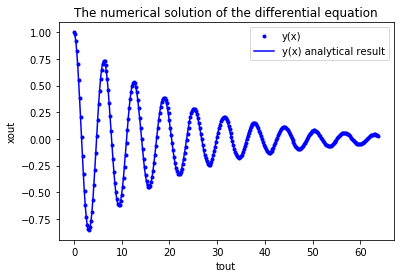

In [12]:
#Step 9
def shm(x,t,B,C):
    return np.array([-B*x[0]-C*x[1], x[0]])

#Initial conditions
B = 0.1;
C = 1;
tstart = 0;
tstop = 64;
h = 0.2;
dy0 = 0;
y0 = 1;

tout=arange(tstart,tstop,h)
xout = odeint(shm,[dy0,y0],tout,args=(B,C));
A = 1;
T = 2/B;
w = sqrt(C-1/(T**2));
delta = 0;
xanalyt = A*exp(-tout/T)*cos(w*tout+delta);
fig, ax = pyplot.subplots()
#ax.plot(tout,xout[:,0], 'r.', label='dy/dx')
ax.plot(tout,xout[:,1], 'b.', label='y(x)')
ax.plot(tout,xanalyt, 'b', label='y(x) analytical result')
pyplot.title('The numerical solution of the differential equation')
leg = ax.legend();
pyplot.xlabel('tout')
pyplot.ylabel('xout')

Instead of determining time constant and rotational speed, I decided to fit the curve 1*exp(-t/T)cos(w*t+delta) to the numerical obtained integral and compare the differences with each other. It is evident to see that the numerical plot fits the analytical plot perfectly, which shows how good and practical the numerical integration method is

Text(0, 0.5, 'xout')

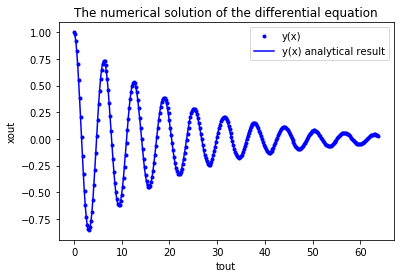

In [13]:
#Step 9
#Initial conditions
B = 0.1;
C = 1;
tstart = 0;
tstop = 64;
h = 0.2;
dy0 = 0;
y0 = 1;

tout=arange(tstart,tstop,h)
xout = odeint(shm,[dy0,y0],tout,args=(B,C));
A = 1;
T = 2/B;
w = sqrt(C-1/(T**2));
delta = 0;
xanalyt = A*exp(-tout/T)*cos(w*tout+delta);
fig, ax = pyplot.subplots()
#ax.plot(tout,xout[:,0], 'r.', label='dy/dx')
ax.plot(tout,xout[:,1], 'b.', label='y(x)')
ax.plot(tout,xanalyt, 'b', label='y(x) analytical result')
pyplot.title('The numerical solution of the differential equation')
leg = ax.legend();
pyplot.xlabel('tout')
pyplot.ylabel('xout')

Finally, the critical damped case of this function is solved by getting numerical and analytical solution separately. I have kept the initial condition that is used for the last step (which is y'(0) = 0 and y(0) = 1). The analytical solution of the critical damped case is when the root of the characteristic equation gets two real roots, which means that B = $sqrt(4C)$.The resultant plot fits with the numerical plot, which shows the success of the numerical integration)

Text(0, 0.5, 'xout')

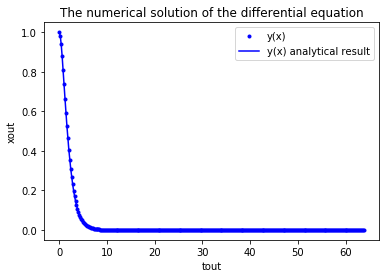

In [14]:
#Step 10
def shm(x,t,B,C):
    return np.array([-B*x[0]-C*x[1], x[0]])

#Initial conditions
B = 2;
C = 1;
tstart = 0;
tstop = 64;
h = 0.2;
dy0 = 0;
y0 = 1;

tout=arange(tstart,tstop,h)
xout = odeint(shm,[dy0,y0],tout,args=(B,C));
A = 1;
T = 2/B;

delta = 0;
B = 1;
xanalyt = A*exp(-tout/T)+B*tout*exp(-tout/T)
fig, ax = pyplot.subplots()
#ax.plot(tout,xout[:,0], 'r.', label='dy/dx')
ax.plot(tout,xout[:,1], 'b.', label='y(x)')
ax.plot(tout,xanalyt, 'b', label='y(x) analytical result')
pyplot.title('The numerical solution of the differential equation')
leg = ax.legend();
pyplot.xlabel('tout')
pyplot.ylabel('xout')

<h2> Relaxation oscillator (NEED MORE UNDERSTANDING) <h2>

The block diagram is confirmed by reproducign the differential equation from the logic of the block diagram, and it shows that the block diagram recreates the differential equation. Then, by following the instruction, I have recreated a relaxation oscillator with B and C = 0.5, at t = 0 - 20s with step size of 0.2, where the system start from rest and start from the 1 meter displacement. I have also used simulink simulation as a reference of the correctness of the PYTHON program, if everything runs correctly, simulink's result should agree with PYTHON's result.

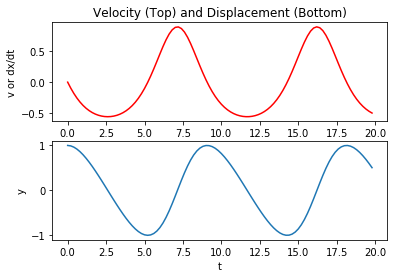

In [15]:
#Step 11
def roscillator(y,t,B,C):
    return np.array([-C*y[1]-B*y[0]*y[1],y[0]])
#Initial conditions
b = 0.5;
c = 0.5;
tstart = 0;
tstop = 20;
h = 0.2;
dy0 = 0;
y0 = 1;

tout=arange(tstart,tstop,h)
xout = odeint(roscillator,[dy0,y0],tout,args=(b,c));

pyplot.subplot(211)
pyplot.title('Velocity (Top) and Displacement (Bottom)')
plot(tout,xout[:,0],'r')
pyplot.ylabel('v or dx/dt')
pyplot.subplot(212)
plot(tout,xout[:,1])
pyplot.xlabel('t')
pyplot.ylabel('y')
plt.show()

The time interval is relatively short, and we can see a similar pattern a sinusoidal wave when B is small. y changes faster when dx/dt > 0, and y cahnges slower when dx/dt < 0. This can be seen from the first plot, where the gradient slowly decreases after passing x = 0. This will be more obvious when we see a large B case.

Then, I repeat step 11 with another input of b = 4 and h = 0.5, and I run simulation up until t = 60s. As what is expected, there is a linear descendent of the position until it hits zero, and then rapidly increase back. We can see the same phenomena on the velocity plot, where the velocity stays stable at a negative velocity, until a spike when the velocity suddenly hits up like a delta function.

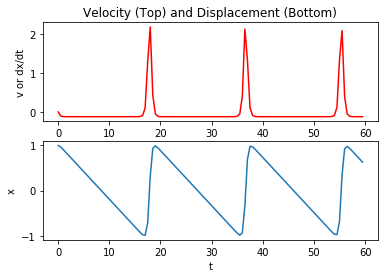

In [16]:
#Step 12
#Initial conditions
b = 4.1;
c = 0.5;
tstart = 0;
tstop = 60;
h = 0.5;
dy0 = 0;
y0 = 1;

tout=arange(tstart,tstop,h)
yout = odeint(roscillator,[dy0,y0],tout,args=(b,c));

pyplot.subplot(211)
pyplot.title('Velocity (Top) and Displacement (Bottom)')
plot(tout,yout[:,0],'r')
pyplot.ylabel('v or dx/dt')
pyplot.subplot(212)
plot(tout,yout[:,1])
pyplot.xlabel('t')
pyplot.ylabel('x')
plt.show()

Here, the effect of B on y's change rate increases much more, we can see that if dy/dt > 0, because of the much larger Bdx/dt than C, we can see that the velocity spikes and the pattern rises fastly.

<h2> Projectile motion with air resistance <h2>

The block diagram is drawn on Simulink, where matlab applies an alternative to numerically calculate the ODE by using control systems. With the block diagram provided, the following function and initial condition is set up which is ready to simulate. 

In [17]:
#Step 13
def projectile(x,t,m,g,k):   
    dxdt = x[0];
    dydt = x[2];
    ddxdt = -1*(k/m)*sqrt(dxdt**2+dydt**2)*dxdt;
    ddydt = -1*g-(k/m)*sqrt(dxdt**2+dydt**2)*dydt;
    #x2 = dydt, x3 = y
    return np.array([ddxdt,dxdt,ddydt,dydt])

def findrange(x,y):
    i2=np.min(np.where(y<0))
    i1=i2-1
    r = (y[i1]*x[i2]-y[i2]*x[i1])/(y[i1]-y[i2])
    return r

After finishing the setup of the function, then a sample initial condition is putted in and the ode is successfully calcualted to get a result. In order to find the maximum range of the bullet, I runned a for loop which automatically put in different intial condition (initial angle) and calculate their respective range, until when the initial angle is 90 degrees. In order to include as much angle as I can, I have extended the stopping time to 60 second. It is found that other than a commonly known value of the angle for the maximum range (which is 45 degrees), with the influence of air drag, the maximum angle is actually altered to around 28.2 +- 0.1 degrees (error given by step size).

0.0


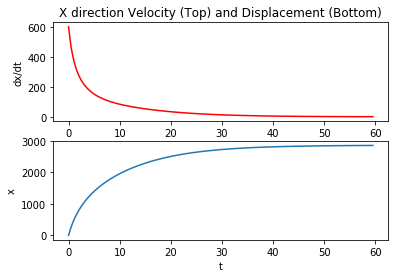

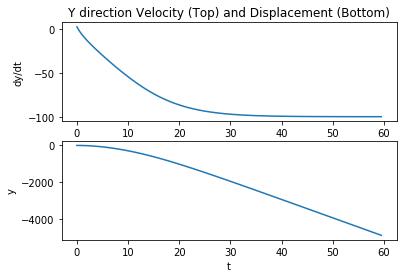

In [43]:
#Step 14
#Initial setup and initial condition for 45 deg
m = 0.01;
g = 9.8;
termv = 100;
k = m*g/(termv**2);
    
tstart = 0;
tstop = 60;
h = 0.5;

iniang = 0.24;
dx0 = 600*cos(iniang*pi/180);
x0 = 0;
dy0 = 600*sin(iniang*pi/180);
y0 = 0;
tout=arange(tstart,tstop,h)
out = odeint(projectile,[dx0,x0,dy0,y0],tout,args=(m,g,k));
range = findrange(out[:,1],out[:,3]);
print(range)

pyplot.subplot(211)
pyplot.title('X direction Velocity (Top) and Displacement (Bottom)')
plot(tout,out[:,0],'r')
pyplot.ylabel('dx/dt')
pyplot.subplot(212)
plot(tout,out[:,1])
pyplot.xlabel('t')
pyplot.ylabel('x')
#pyplot.axhline(y=range)
plt.show()

pyplot.subplot(211)
pyplot.title('Y direction Velocity (Top) and Displacement (Bottom)')
plot(tout,out[:,2])
pyplot.xlabel('t')
pyplot.ylabel('dy/dt')
pyplot.subplot(212)
plot(tout,out[:,3])
pyplot.xlabel('t')
pyplot.ylabel('y')
plt.show()


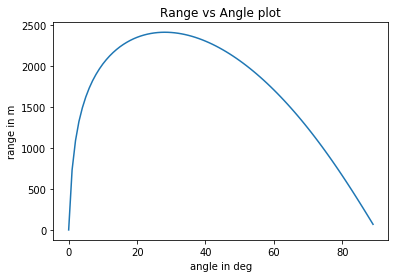

The maximum angle is:
28
Which gives the range of:
2409.070183386579


In [32]:
#Step 14
#Initial setup and initial condition
m = 0.01;
g = 9.8;
termv = 100;
k = m*g/(termv**2);
    
tstart = 0;
tstop = 60;
h = 0.5;

anglelist = arange(0,90,1);
i=0;
range = [0] * size(anglelist)
for x in anglelist:
    iniang = x;
    dx0 = 600*cos(iniang*pi/180);
    x0 = 0;
    dy0 = 600*sin(iniang*pi/180);
    y0 = 0;
    tout=arange(tstart,tstop,h)
    out = odeint(projectile,[dx0,x0,dy0,y0],tout,args=(m,g,k));
    range[i] = findrange(out[:,1],out[:,3]);
    i = i+1;

#Maximum range finder
pyplot.title('Range vs Angle plot')
plot(anglelist,range)
pyplot.xlabel('angle in deg')
pyplot.ylabel('range in m')
plt.show()
maxrange=np.max(range)
index = range.index(maxrange)
maxangle = anglelist[index];
print("The maximum angle is:")
print(maxangle)
print("Which gives the range of:")
print(maxrange)

Then, I changed the timestep into h = 0.1s, in order to give the finnest precision to predict the initial angle that allows the bullet to land on a range of 50, 100 and 200 meters. Instead of trial and error, I decide to ultilize PYTHON's functionality of searching and finding elements of the arrays that fulfills some conditions. Note that previously, I have created a couple of arrays which couples the angle in degrees together with their corresponding range.

In order to get the precision that is needed, I first need to shrink the range of the range array in order to be able to give a higher numbers of division. After this step, I am able to find all of the required angles from 87 degrees to 90 degrees.

In [44]:
#Step 15
#Initial setup and initial condition
m = 0.01;
g = 9.8;
termv = 100;
k = m*g/(termv**2);
    
tstart = 0;
tstop = 60;
h = 0.1;

anglelist = arange(89,90,0.0001);
i=0;
range = np.zeros(size(anglelist))
maxheight = np.zeros(size(anglelist))
finalVelo = np.zeros(size(anglelist))

#Create range vs angle
for x in anglelist:
    iniang = x;
    dx0 = 600*cos(iniang*pi/180);
    x0 = 0;
    dy0 = 600*sin(iniang*pi/180);
    y0 = 0;
    tout=arange(tstart,tstop,h)
    out = odeint(projectile,[dx0,x0,dy0,y0],tout,args=(m,g,k));
    range[i] = findrange(out[:,1],out[:,3]);
    maxheight[i] = numpy.amax(out[:,3]);
    finalVelo[i] = sqrt((out[len(out[:,2])-1,2])**2+(out[len(out[:,0])-1,2])**2)
    i = i+1;

#Find angle that shoots 50 meters
deltax = 0.5;
ranreq = 50;
Index=np.where(abs(range - ranreq) <= deltax);
rangelist = range[Index];
anglerel = anglelist[Index];
heightabove = tan(anglerel*pi/180)*rangelist;
print("The relevant angle for 50m are:")
print(anglerel)
print("Which gives the range of:")
print(rangelist)
print("With maximum height of:")
print(maxheight[Index])
print("With final velocity of:")
print(finalVelo[Index])
print("Height Above:")
print(heightabove)

#Find angle that shoots 100 meters
deltax = 0.5;
ranreq = 100;
Index=np.where(abs(range - ranreq) <= deltax);
rangelist = range[Index];
anglerel = anglelist[Index];
heightabove = tan(anglerel*pi/180)*rangelist;
print("The relevant angle for 100m are:")
print(anglerel)
print("Which gives the range of:")
print(rangelist)
print("With maximum height of:")
print(maxheight[Index])
print("With final velocity of:")
print(finalVelo[Index])
print("Height Above:")
print(heightabove)

#Find angle that shoots 200 meters
deltax = 0.5;
ranreq = 200;
Index=np.where(abs(range - ranreq) <= deltax);
rangelist = range[Index];
anglerel = anglelist[Index];
heightabove = tan(anglerel*pi/180)*rangelist;
print("The relevant angle for 200m are:")
print(anglerel)
print("Which gives the range of:")
print(rangelist)
print("With maximum height of:")
print(maxheight[Index])
print("With final velocity of:")
print(finalVelo[Index])
print("Height Above:")
print(heightabove)

The relevant angle for 50m are:
[89.2622 89.2623 89.2624 89.2625 89.2626 89.2627 89.2628 89.2629 89.263
 89.2631 89.2632 89.2633 89.2634 89.2635 89.2636 89.2637 89.2638 89.2639
 89.264  89.2641 89.2642 89.2643 89.2644 89.2645 89.2646 89.2647 89.2648
 89.2649 89.265  89.2651 89.2652 89.2653 89.2654 89.2655 89.2656 89.2657
 89.2658 89.2659 89.266  89.2661 89.2662 89.2663 89.2664 89.2665 89.2666
 89.2667 89.2668 89.2669 89.267  89.2671 89.2672 89.2673 89.2674 89.2675
 89.2676 89.2677 89.2678 89.2679 89.268  89.2681 89.2682 89.2683 89.2684
 89.2685 89.2686 89.2687 89.2688 89.2689 89.269  89.2691 89.2692 89.2693
 89.2694 89.2695 89.2696 89.2697 89.2698 89.2699 89.27   89.2701 89.2702
 89.2703 89.2704 89.2705 89.2706 89.2707 89.2708 89.2709 89.271  89.2711
 89.2712 89.2713 89.2714 89.2715 89.2716 89.2717 89.2718 89.2719 89.272
 89.2721 89.2722 89.2723 89.2724 89.2725 89.2726 89.2727 89.2728 89.2729
 89.273  89.2731 89.2732 89.2733 89.2734 89.2735 89.2736 89.2737 89.2738
 89.2739 89.274  89.2

<h1> Coupled Mass <h1>

By following through the block diagram, the input of the second order differentiation's integral follows with the equation of motion, and the feedback loop is connected correctly. Then, a function file that simulates the system is putted as below, with the first result being simulated (when everything are at rest). As expected, we can see that the wave forms a wavepacket, which is the sum of two normal mode standing waves:

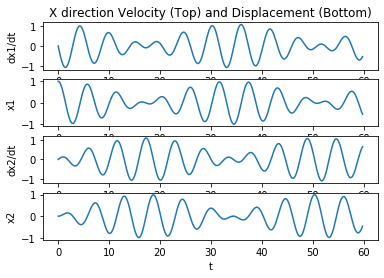

In [21]:
#Step 16
#Coupled Mass
def CoupMass(x,t,k,m,kc):   
    dx1dt = x[0];
    #x1 = x[1];
    dx2dt = x[2];
    #x2 = x[3];
    ddx1dt = (-1/m)*(k*x[1]+kc*(x[1]-x[3]));
    ddx2dt = (-1/m)*(k*x[3]+kc*(x[3]-x[1]));
    #x2 = dydt, x3 = y
    return np.array([ddx1dt,dx1dt,ddx2dt,dx2dt])

#Initial setup and initial condition
k = 1;
m = 1;
kc = 0.2;
    
tstart = 0;
tstop = 60;
h = 0.2;
dx10 = 0;
x10 = 1;
dx20 = 0;
x20 = 0;
tout=arange(tstart,tstop,h)
out = odeint(CoupMass,[dx10,x10,dx20,x20],tout,args=(k,m,kc));

pyplot.subplot(411)
pyplot.title('X direction Velocity (Top) and Displacement (Bottom)')
plot(tout,out[:,0])
pyplot.ylabel('dx1/dt')
pyplot.subplot(412)
plot(tout,out[:,1])
pyplot.xlabel('t')
pyplot.ylabel('x1')
pyplot.subplot(413)
plot(tout,out[:,2])
pyplot.xlabel('t')
pyplot.ylabel('dx2/dt')
pyplot.subplot(414)
plot(tout,out[:,3])
pyplot.xlabel('t')
pyplot.ylabel('x2')
#pyplot.axhline(y=range)
plt.show()

With the ode calculated result of position and velocity, the kinetic energy of masses and potential energy of springs can be calculated by the following code with the the total energy verified as constant.

Text(0, 0.5, 'Energy in J')

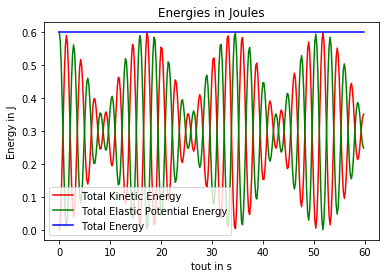

In [22]:
#Step 17
Kx1 = 0.5*m*(out[:,0]**2);
Kx2 = 0.5*m*(out[:,2]**2);
Elastic1 = 0.5*k*(out[:,1]**2);
Elastic3 = 0.5*k*(out[:,3]**2);
Elastic2 = 0.5*kc*((out[:,3]-out[:,1])**2);
TotalK = Kx1+Kx2;
TotalElastic = Elastic1+Elastic2+Elastic3;
Total = TotalK + TotalElastic;

fig, ax = pyplot.subplots()
ax.plot(tout,TotalK, 'r', label='Total Kinetic Energy')
ax.plot(tout,TotalElastic, 'g', label='Total Elastic Potential Energy')
ax.plot(tout,Total, 'b', label='Total Energy')
pyplot.title('Energies in Joules')
leg = ax.legend();
pyplot.xlabel('tout in s')
pyplot.ylabel('Energy in J')

Finally, different intiial condition of symmetric mode and antisymmetric mode is plotted to verify the numerical modelling by using simple cases:
We can see that at a, the two motion are in phase and b are completely out of phase.
The frequency is calculated as below, which fits with the graph well.
The amplitude is 1 for both case, which is as expected.

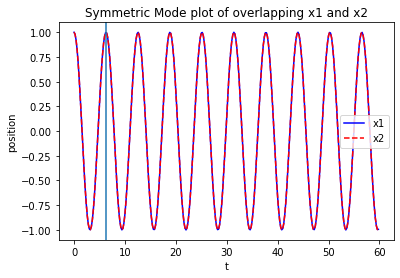

In [23]:
#Step 18
#Coupled Mass
def CoupMass(x,t,k,m,kc):   
    dx1dt = x[0];
    #x1 = x[1];
    dx2dt = x[2];
    #x2 = x[3];
    ddx1dt = (-1/m)*(k*x[1]+kc*(x[1]-x[3]));
    ddx2dt = (-1/m)*(k*x[3]+kc*(x[3]-x[1]));
    #x2 = dydt, x3 = y
    return np.array([ddx1dt,dx1dt,ddx2dt,dx2dt])

#Initial setup and initial condition
k = 1;
m = 1;
kc = 0.2;
    
tstart = 0;
tstop = 60;
h = 0.2;

#Symmetric
dx10 = 0;
x10 = 1;
dx20 = 0;
x20 = 1;
ws = sqrt(k);
T = 2*pi/ws;
tout=arange(tstart,tstop,h)
out = odeint(CoupMass,[dx10,x10,dx20,x20],tout,args=(k,m,kc));

fig, ax = pyplot.subplots()
pyplot.title('Symmetric Mode plot of overlapping x1 and x2')
ax.plot(tout,out[:,1], 'b', label='x1')
ax.plot(tout,out[:,3], 'r--', label='x2')
pyplot.xlabel('t')
pyplot.ylabel('position')
leg = ax.legend();
pyplot.axvline(x=T)
plt.show()

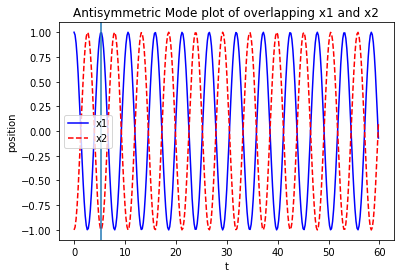

In [24]:
#Antisymmetric
dx10 = 0;
x10 = 1;
dx20 = 0;
x20 = -1;
wa = ws*sqrt(1+2*kc/k);
T = 2*pi/wa;
tout=arange(tstart,tstop,h)
out = odeint(CoupMass,[dx10,x10,dx20,x20],tout,args=(k,m,kc));

fig, ax = pyplot.subplots()
pyplot.title('Antisymmetric Mode plot of overlapping x1 and x2')
ax.plot(tout,out[:,1], 'b', label='x1')
ax.plot(tout,out[:,3], 'r--', label='x2')
pyplot.xlabel('t')
pyplot.ylabel('position')
leg = ax.legend();
pyplot.axvline(x=T)
plt.show()